In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Project\notebooks
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Project


In [2]:
yieldingPoint = 0.004

def getIndexBeforeStrainLevel(strain, level):
    for i in range(len(strain)):
        if strain[i] > level:
            return i - 1
def preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ):
    strainPathXprocess = strainPathX.copy()
    strainPathYprocess = strainPathY.copy()
    strainPathZprocess = strainPathZ.copy()
    turningIndices = turningStressPoints(trueStress)
    #print(turningIndices)
    #unloadingIndex = turningIndices[0]
    reloadingIndex = turningIndices[1]
    for i in range(reloadingIndex, trueStrain.size):
        strainPathXprocess[i] -= strainPathX[reloadingIndex]
        strainPathYprocess[i] -= strainPathY[reloadingIndex]
        strainPathZprocess[i] -= strainPathZ[reloadingIndex]
    strainReloading = (2/3 * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2)) ** (1/2) + trueStrain[reloadingIndex]
    actualStrain = trueStrain.copy()
    for i in range(reloadingIndex, trueStrain.size):
        actualStrain[i] = strainReloading[i]
    return (actualStrain, trueStress)

def turningStressPoints(trueStress):
    differences = np.diff(trueStress)
    index = 1
    turningIndices = []
    while index < differences.size:
        if (differences[index - 1] <= 0 and differences[index] >= 0) or (differences[index - 1] >= 0 and differences[index] <= 0):
            turningIndices.append(index)
        index += 1
    return turningIndices

def preprocessDAMASKNonlinear(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    strainPathX = df["1_ln(V)"].to_numpy().reshape(-1)
    strainPathY = df["5_ln(V)"].to_numpy().reshape(-1)
    strainPathZ = df["9_ln(V)"].to_numpy().reshape(-1)
    return preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ)

################################
# Preprocessing linear loading #
################################

def preprocessLinear(trueStrain, trueStress):
    # truePlasticStrain = trueStrain - trueElasticstrain = trueStrain - trueStress/Young's modulus
    Young = (trueStress[1] - trueStress[0]) / (trueStrain[1] - trueStrain[0])
    truePlasticStrain = trueStrain - trueStress / Young    
    return (truePlasticStrain, trueStress)

def preprocessDAMASKLinear(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    return preprocessLinear(trueStrain, trueStress)   

##############################
# Obtain the original curves #
##############################

def preprocessDAMASKTrue(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"]
    trueStress = df["Mises(Cauchy)"] 
    return (trueStrain, trueStress)



## Parameter analysis in the PH model

### Note: no need to multiply stress by 1e-6

In [5]:
# To comment multiple lines, press Ctrl + K + C
# To uncomment multiple lines, press Ctrl + K + U

size = 18

# Parameter a
paramValues = ["1.1","2","3"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
paramName = "a" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
paramNameLatex = "a" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
legendsize = -4.5
ncol = 2

# Parameter γ̇₀
# paramValues = ["0.0001","0.001","0.01","0.1","1","10","50","100"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "gdot0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "γ̇₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "e-3" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -5
# ncol = 2

# Parameter h₀
# paramValues = ["100","200","300","400","800","1200","1600","2000"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "h0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "h₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -4.5
# ncol = 2

# Parameter n 
# paramValues = ["10","15","20","40","60","80","100"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "n" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "n" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 2

# Parameter τ₀
# paramValues = ["1","25","50","75","100","125","150","175","200"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "tau0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "τ₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "MPa" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -7
# ncol = 2

# Parameter τₛₐₜ
# paramValues = ["50","100","150","200","300","400","600","800","1000"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "tausat" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "τₛₐₜ" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "MPa" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -9
# ncol = 3

# parameter self 
# paramValues = ["0.01","0.25","0.5","0.75","1","1.25","1.5","1.75","2"]
# paramName = "self" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "self" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 2

# parameter coplanar
# paramValues = ["0.01","0.5","1","2"]
# paramName = "coplanar" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "coplanar" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter collinear
# paramValues = ["0.01","1","5","10","15","20","25"]
# paramName = "collinear" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "collinear" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 2

# parameter orthogonal
# paramValues= ["0.01","1","2","3"]
# paramName = "orthogonal" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "orthogonal" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter glissile
# paramValues = ["0.01","1","2","3"]
# paramName = "glissile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "glissile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter sessile
# paramValues = ["0.01","1","2","3"]
# paramName = "sessile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "sessile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

IndexError: list index out of range

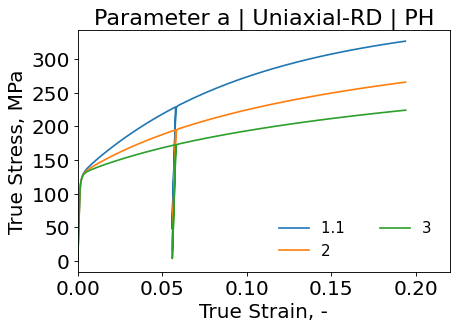

<Figure size 480x320 with 0 Axes>

In [14]:
# Plotting uniaxial-RD loading
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_UAT_RD/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")

plt.title(f"Parameter {paramNameLatex} | Uniaxial-RD | PH", size=size + 2)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.22])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size + legendsize, ncol=ncol, facecolor='white')
legend.get_frame().set_linewidth(0.0)

# Plotting uniaxial-TD loading
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_UAT_TD/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")

plt.title(f"Parameter {paramNameLatex} | Uniaxial-RD | PH", size=size + 2)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.22])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size + legendsize, ncol=ncol, facecolor='white')
legend.get_frame().set_linewidth(0.0)


### Note: need to multiply stress by 1e-6

## Parameter analysis in the DB model

In [ ]:
paramValues_a = ["1.1","2","3"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
#paramValues_a = ["1.1","3","10"]
paramName = "a" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
paramNameLatex = "a" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
size = 18

############################### 
# a
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues_a: 
    path = f"/home/kien/Crystal-Plasticity-COE/notebooks/analysis_parameters_nonlinear_uniaxial_TD/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    #trueStress *= 1e-6

    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")#, marker='.', markersize=5)

plt.title(f"Parameter {paramNameLatex}", size=size + 2)
#plt.title(f"Step 2: Control hardening", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.yticks([0,50,100,150,200,250,300,350]) 
# plt.ylim([80, 310])
plt.xlim([0, 0.2])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 4.5, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

## Parameter analysis in the DB model

### Note: need to multiply stress by 1e-6

In [4]:
paramValues = ["1","4","7"] # <- put the postprocessed files here and rename to the param's value change
paramName = "dipole"
paramNameLatex = "dα"
paramUnit = "b"
size = 18

############################### 
# a
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"/home/kien/Crystal-Plasticity-COE/notebooks/analysis_parameters_nonlinear_uniaxial_RD/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6

    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#, marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
#plt.ylim([80, 710])
plt.xlim([0, 0.2])

plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size - 4, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)



FileNotFoundError: [Errno 2] No such file or directory: '/home/kien/Crystal-Plasticity-COE/notebooks/analysis_parameters_nonlinear_uniaxial_RD/DB/dipole/1.txt'

<Figure size 480x320 with 0 Axes>

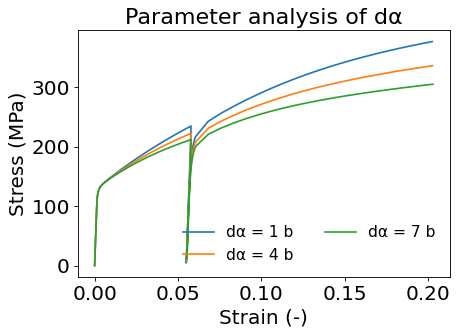

In [66]:
paramValues = ["1","4","7"] # <- put the postprocessed files here and rename to the param's value change
paramName = "dipole"
paramNameLatex = "dα"
paramUnit = "b"
size = 18

############################### 
# a
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"/home/kien/Crystal-Plasticity-COE/notebooks/analysis_parameters_nonlinear_uniaxial_TD/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    trueStress *= 1e-6

    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#, marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
#plt.ylim([80, 710])
#plt.xlim([0, 0.2])

plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size - 4, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

